In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings('ignore') # filter warnings


In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Visualisation

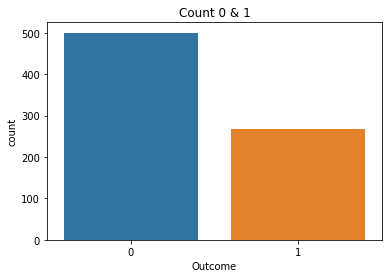

In [3]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

In [4]:
print(data.info()) 
describe = data.describe()
describe.T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


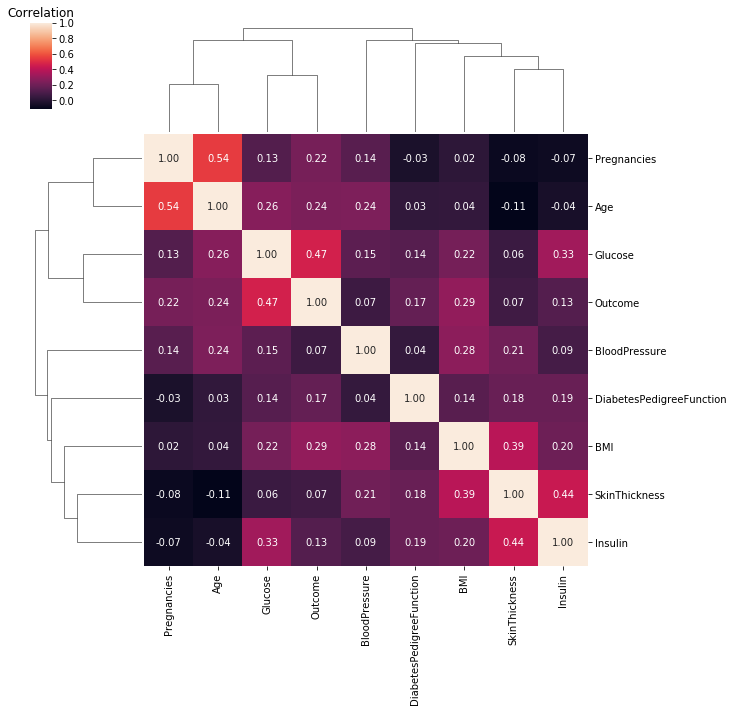

In [5]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation')
plt.show();

In [6]:
#Value = 0 for certain columns is wrong,  for example BMI can nevr be 0 for anyone, Hence it has to be a NULL Value
data_copy = data.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [7]:
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


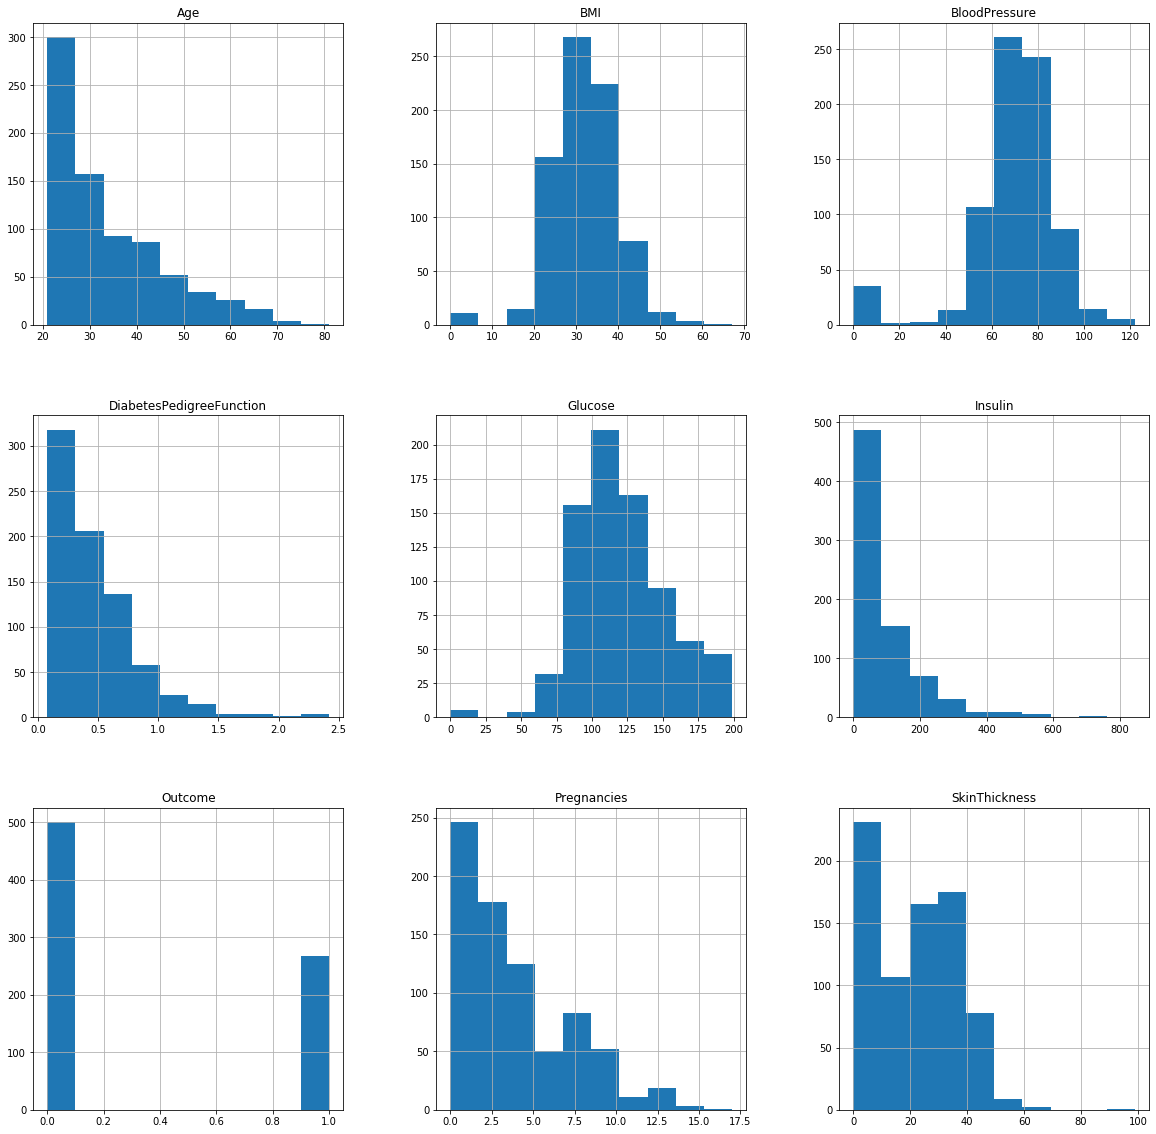

In [8]:
p = data.hist(figsize = (20,20))

In [9]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)


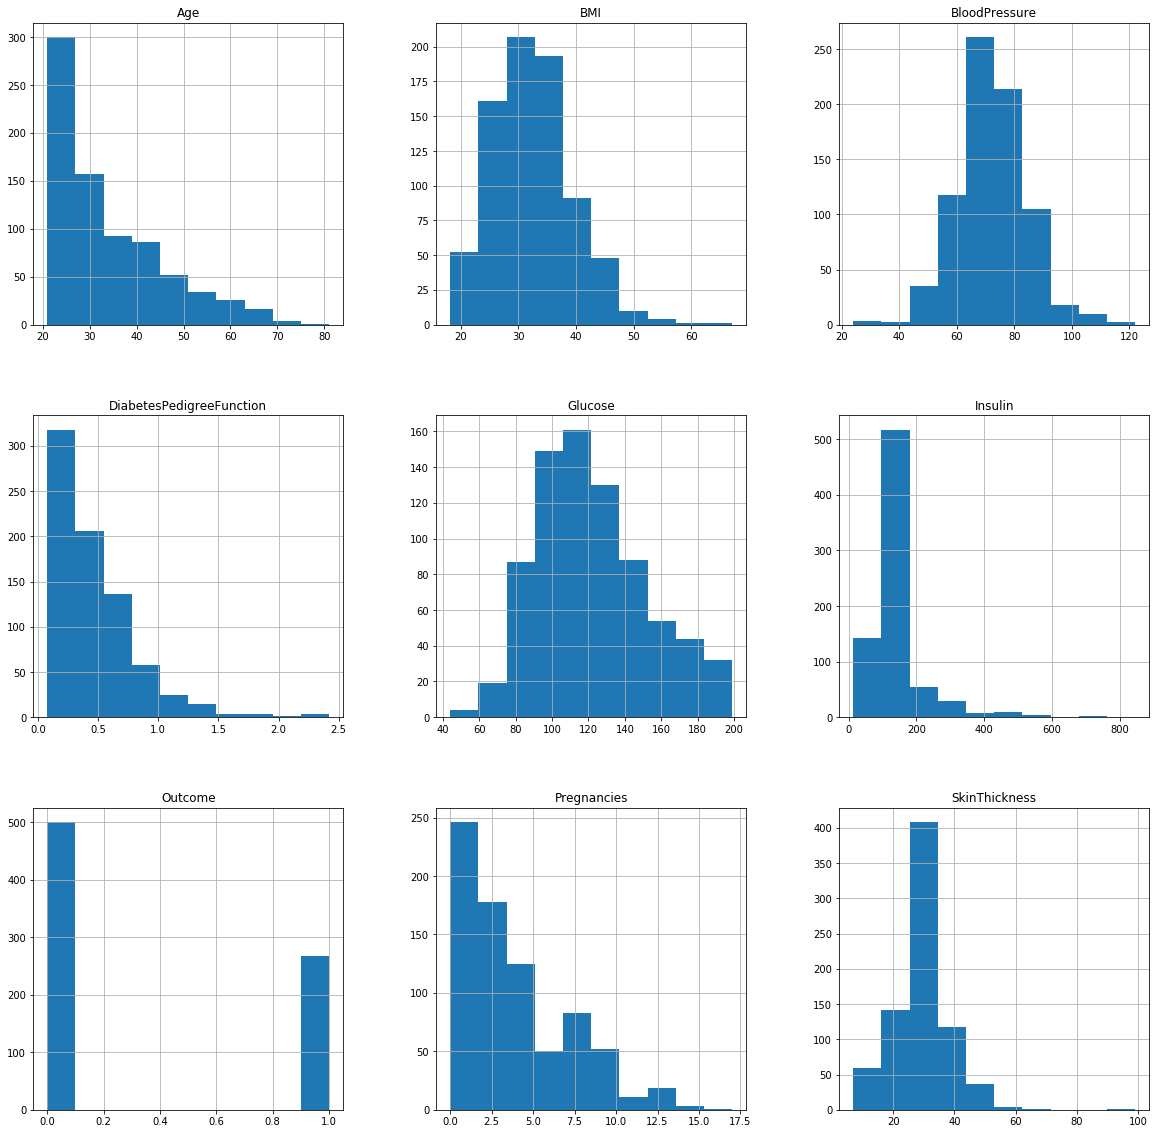

In [10]:
p1=data_copy.hist(figsize = (20,20))

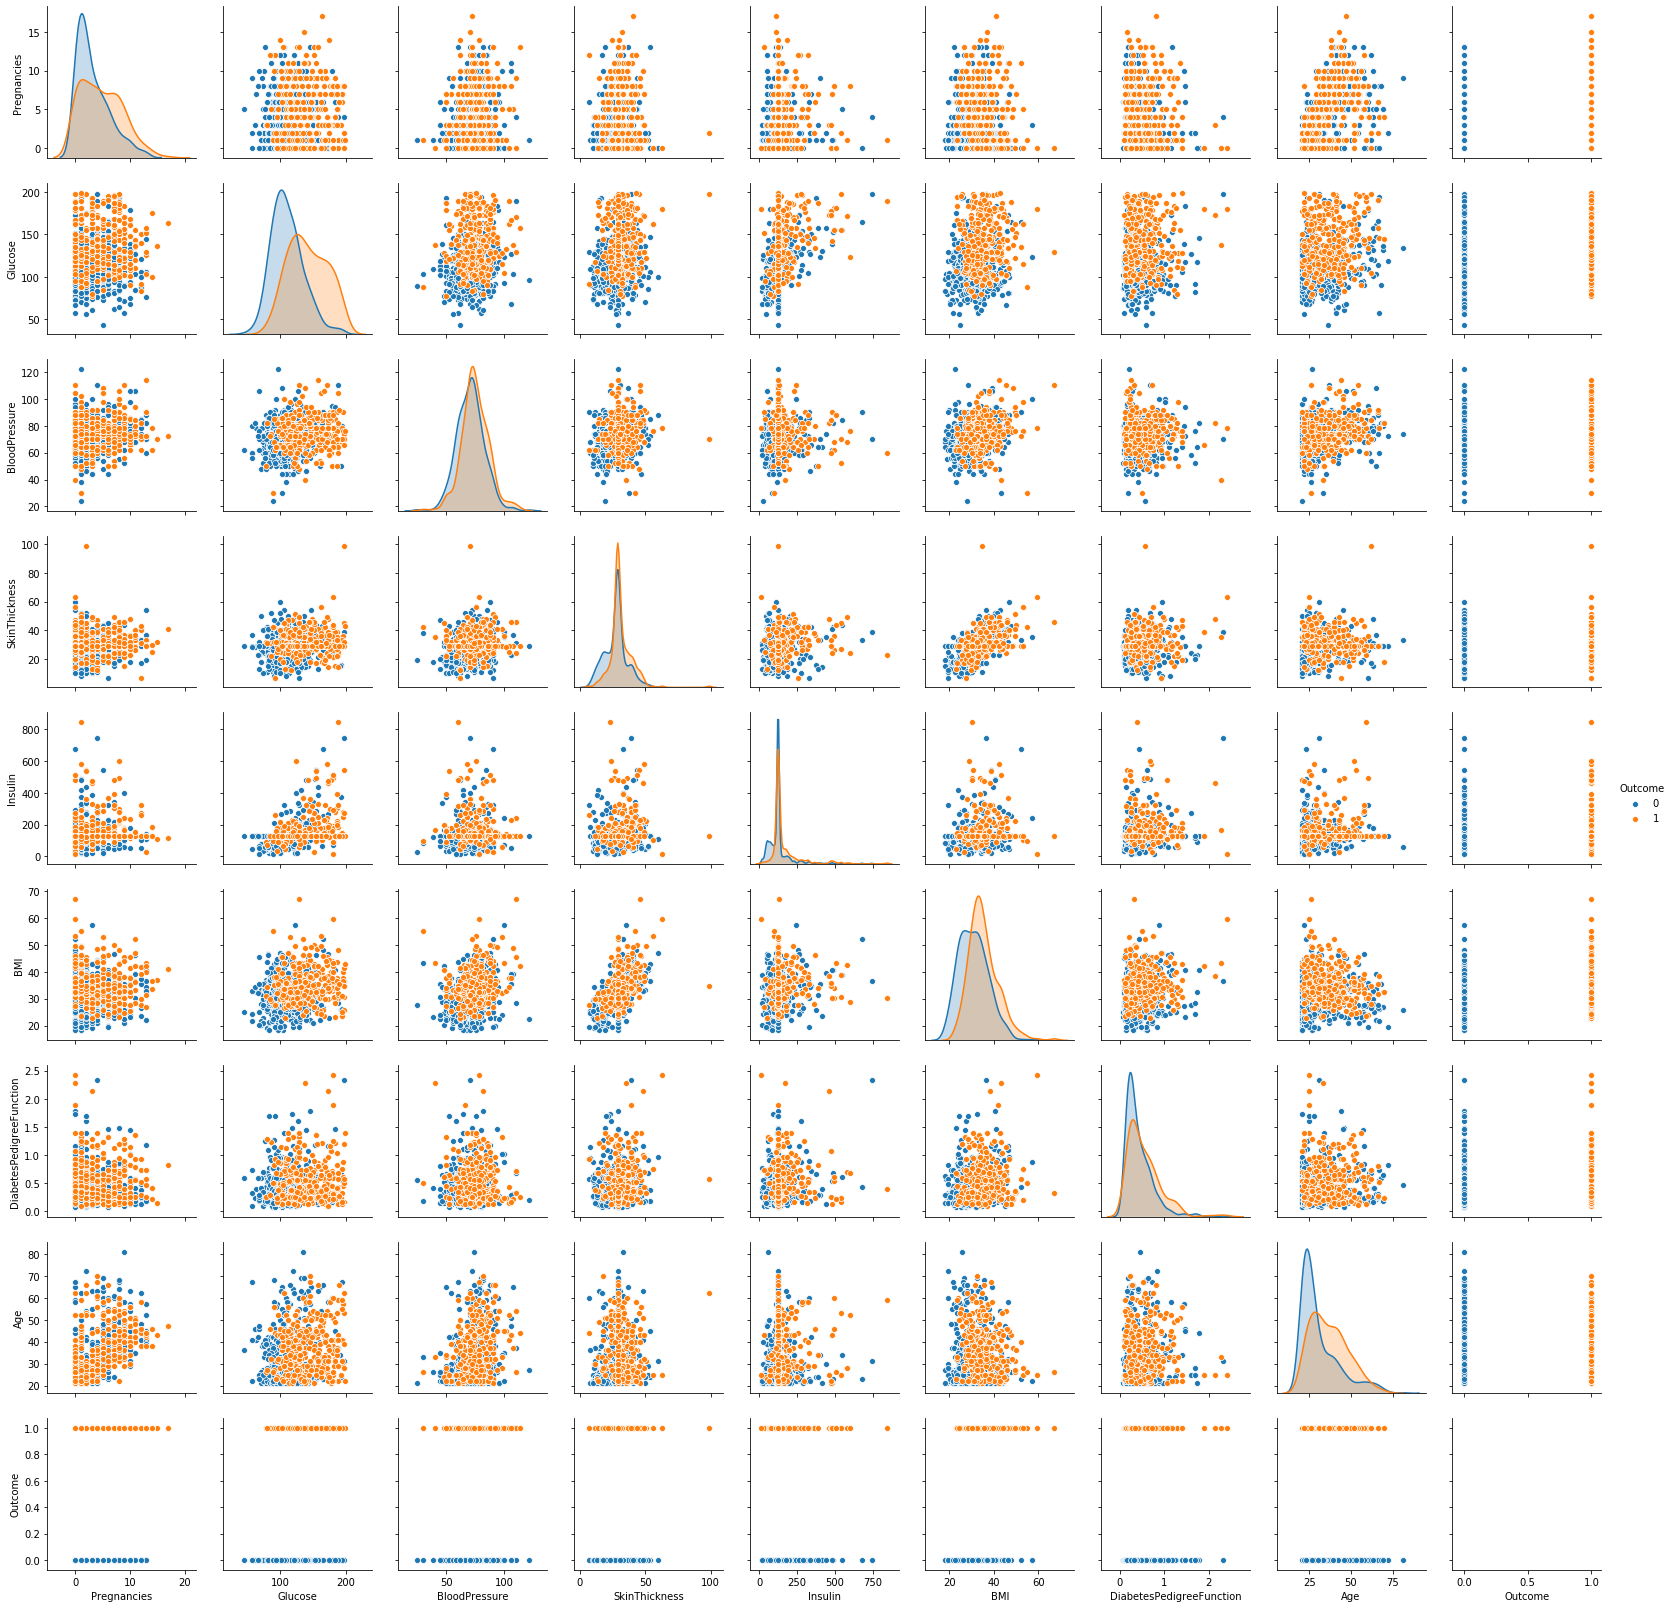

In [11]:
p=sns.pairplot(data_copy, hue = 'Outcome')

In [13]:
sc_X = StandardScaler()

X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [15]:
y = data_copy.Outcome
# y.head()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)


Decision Tree


In [20]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= x_train, y=y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.6725619834710741
Standart Deviation Accuracies:  0.1565050107534527


In [22]:
DTC.fit(x_train,y_train) #learning
DTscore= DTC.score(x_test,y_test)
print("Decision Tree Score: ",DTscore)

Decision Tree Score:  0.69140625


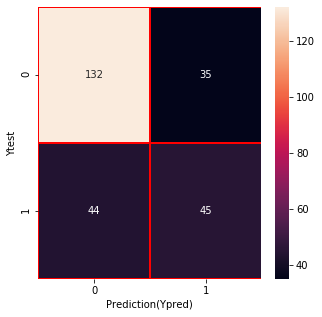

In [24]:
ypred_dt= DTC.predict(x_test)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,ypred_dt)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytest")
plt.show()

Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) #n_estimator = DT

In [26]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7637828054298642
Standart Deviation Accuracies:  0.02681253298534584


In [27]:
RFC.fit(x_train,y_train)
RFscore=RFC.score(x_test,y_test)
print("Random Forest Score: ",RFscore)


Random Forest Score:  0.75


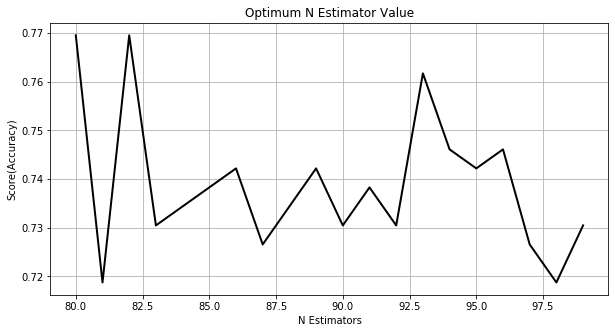

In [28]:
#Find Optimum K value
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

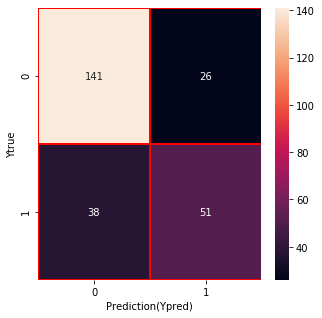

In [30]:
ypred_rf= RFC.predict(x_test)
CM = confusion_matrix(y_test,ypred_rf)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

Neural Network

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [33]:
def buildclassifier():
    classifier = Sequential() #initialize NN
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu', input_dim =x_train.shape[1]))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier

In [34]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 500)
accuracies = cross_val_score(estimator = classifier, X = x_train, y= y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/500
409/409 [==============================] - 1s 4ms/step - loss: 0.6922 - acc: 0.6479
Epoch 2/500
409/409 [==============================] - 0s 68us/step - loss: 0.6896 - acc: 0.6479
Epoch 3/500
409/409 [==============================] - 0s 68us/step - loss: 0.6865 - acc: 0.6479
Epoch 4/500
409/409 [==============================] - 0s 66us/step - loss: 0.6819 - acc: 0.6479
Epoch 5/500
409/409 [==============================] - 0s 73us/step - loss: 0.6751 - acc: 0.6479
Epoch 6/500
409/409 [==============================] - 0s 66us/step - loss: 0.6599 - acc: 0.6479
Epoch 7/500
409/409 [==============================] - 0s 66us/step - loss: 0.6157 - acc: 0.6479
Epoch 8/500
409/409 [==============================] - 0s 73us/step - loss: 0.5461 - acc: 0.6479
Epoch 9/500
409/409 [==============================] - 0s 76us/step - loss: 0.5229 - acc: 0.6479
Epoch 10/500
409/409 [======

409/409 [==============================] - 0s 61us/step - loss: 0.3429 - acc: 0.8582
Epoch 70/500
409/409 [==============================] - 0s 56us/step - loss: 0.3371 - acc: 0.8582
Epoch 71/500
409/409 [==============================] - 0s 66us/step - loss: 0.3376 - acc: 0.8582
Epoch 72/500
409/409 [==============================] - 0s 68us/step - loss: 0.3364 - acc: 0.8582
Epoch 73/500
409/409 [==============================] - 0s 56us/step - loss: 0.3316 - acc: 0.8606
Epoch 74/500
409/409 [==============================] - 0s 56us/step - loss: 0.3304 - acc: 0.8680
Epoch 75/500
409/409 [==============================] - 0s 54us/step - loss: 0.3335 - acc: 0.8557
Epoch 76/500
409/409 [==============================] - 0s 56us/step - loss: 0.3289 - acc: 0.8655
Epoch 77/500
409/409 [==============================] - 0s 54us/step - loss: 0.3353 - acc: 0.8582
Epoch 78/500
409/409 [==============================] - 0s 56us/step - loss: 0.3251 - acc: 0.8753
Epoch 79/500
409/409 [===========

409/409 [==============================] - 0s 54us/step - loss: 0.2166 - acc: 0.9169
Epoch 153/500
409/409 [==============================] - 0s 54us/step - loss: 0.2105 - acc: 0.9193
Epoch 154/500
409/409 [==============================] - 0s 56us/step - loss: 0.2295 - acc: 0.9071
Epoch 155/500
409/409 [==============================] - 0s 56us/step - loss: 0.2254 - acc: 0.9095
Epoch 156/500
409/409 [==============================] - 0s 63us/step - loss: 0.2077 - acc: 0.9144
Epoch 157/500
409/409 [==============================] - 0s 54us/step - loss: 0.2085 - acc: 0.9169
Epoch 158/500
409/409 [==============================] - 0s 61us/step - loss: 0.2181 - acc: 0.9095
Epoch 159/500
409/409 [==============================] - 0s 56us/step - loss: 0.2103 - acc: 0.9120
Epoch 160/500
409/409 [==============================] - 0s 59us/step - loss: 0.2148 - acc: 0.9120
Epoch 161/500
409/409 [==============================] - 0s 59us/step - loss: 0.2098 - acc: 0.9144
Epoch 162/500
409/409 [=

409/409 [==============================] - 0s 56us/step - loss: 0.1747 - acc: 0.9340
Epoch 235/500
409/409 [==============================] - 0s 56us/step - loss: 0.1740 - acc: 0.9340
Epoch 236/500
409/409 [==============================] - 0s 63us/step - loss: 0.1729 - acc: 0.9340
Epoch 237/500
409/409 [==============================] - 0s 56us/step - loss: 0.1732 - acc: 0.9340
Epoch 238/500
409/409 [==============================] - 0s 61us/step - loss: 0.1774 - acc: 0.9315
Epoch 239/500
409/409 [==============================] - 0s 54us/step - loss: 0.1793 - acc: 0.9315
Epoch 240/500
409/409 [==============================] - 0s 61us/step - loss: 0.1744 - acc: 0.9315
Epoch 241/500
409/409 [==============================] - 0s 63us/step - loss: 0.1789 - acc: 0.9291
Epoch 242/500
409/409 [==============================] - 0s 56us/step - loss: 0.1748 - acc: 0.9315
Epoch 243/500
409/409 [==============================] - 0s 61us/step - loss: 0.1734 - acc: 0.9340
Epoch 244/500
409/409 [=

409/409 [==============================] - 0s 56us/step - loss: 0.1479 - acc: 0.9340
Epoch 317/500
409/409 [==============================] - 0s 56us/step - loss: 0.1473 - acc: 0.9340
Epoch 318/500
409/409 [==============================] - 0s 59us/step - loss: 0.1463 - acc: 0.9340
Epoch 319/500
409/409 [==============================] - 0s 59us/step - loss: 0.1446 - acc: 0.9340
Epoch 320/500
409/409 [==============================] - 0s 56us/step - loss: 0.1440 - acc: 0.9340
Epoch 321/500
409/409 [==============================] - 0s 61us/step - loss: 0.1433 - acc: 0.9340
Epoch 322/500
409/409 [==============================] - 0s 54us/step - loss: 0.1428 - acc: 0.9340
Epoch 323/500
409/409 [==============================] - 0s 59us/step - loss: 0.1414 - acc: 0.9340
Epoch 324/500
409/409 [==============================] - 0s 58us/step - loss: 0.1404 - acc: 0.9340
Epoch 325/500
409/409 [==============================] - 0s 56us/step - loss: 0.1399 - acc: 0.9340
Epoch 326/500
409/409 [=

409/409 [==============================] - 0s 59us/step - loss: 0.1348 - acc: 0.9242
Epoch 399/500
409/409 [==============================] - 0s 59us/step - loss: 0.1341 - acc: 0.9242
Epoch 400/500
409/409 [==============================] - 0s 63us/step - loss: 0.1328 - acc: 0.9267
Epoch 401/500
409/409 [==============================] - 0s 59us/step - loss: 0.1321 - acc: 0.9291
Epoch 402/500
409/409 [==============================] - 0s 63us/step - loss: 0.1301 - acc: 0.9291
Epoch 403/500
409/409 [==============================] - 0s 56us/step - loss: 0.1299 - acc: 0.9267
Epoch 404/500
409/409 [==============================] - 0s 56us/step - loss: 0.1311 - acc: 0.9242
Epoch 405/500
409/409 [==============================] - 0s 68us/step - loss: 0.1290 - acc: 0.9291
Epoch 406/500
409/409 [==============================] - 0s 59us/step - loss: 0.1277 - acc: 0.9291
Epoch 407/500
409/409 [==============================] - 0s 51us/step - loss: 0.1278 - acc: 0.9291
Epoch 408/500
409/409 [=

409/409 [==============================] - 0s 59us/step - loss: 0.0873 - acc: 0.9658
Epoch 481/500
409/409 [==============================] - 0s 59us/step - loss: 0.0845 - acc: 0.9682
Epoch 482/500
409/409 [==============================] - 0s 54us/step - loss: 0.0844 - acc: 0.9707
Epoch 483/500
409/409 [==============================] - 0s 59us/step - loss: 0.0826 - acc: 0.9756
Epoch 484/500
409/409 [==============================] - 0s 63us/step - loss: 0.0824 - acc: 0.9682
Epoch 485/500
409/409 [==============================] - 0s 66us/step - loss: 0.0805 - acc: 0.9707
Epoch 486/500
409/409 [==============================] - 0s 66us/step - loss: 0.0812 - acc: 0.9707
Epoch 487/500
409/409 [==============================] - 0s 59us/step - loss: 0.0796 - acc: 0.9731
Epoch 488/500
409/409 [==============================] - 0s 61us/step - loss: 0.0803 - acc: 0.9731
Epoch 489/500
409/409 [==============================] - 0s 66us/step - loss: 0.0786 - acc: 0.9731
Epoch 490/500
409/409 [=

409/409 [==============================] - 0s 51us/step - loss: 0.3625 - acc: 0.8631
Epoch 64/500
409/409 [==============================] - 0s 61us/step - loss: 0.3587 - acc: 0.8729
Epoch 65/500
409/409 [==============================] - 0s 61us/step - loss: 0.3601 - acc: 0.8680
Epoch 66/500
409/409 [==============================] - 0s 61us/step - loss: 0.3574 - acc: 0.8704
Epoch 67/500
409/409 [==============================] - 0s 58us/step - loss: 0.3557 - acc: 0.8680
Epoch 68/500
409/409 [==============================] - 0s 61us/step - loss: 0.3571 - acc: 0.8704
Epoch 69/500
409/409 [==============================] - 0s 66us/step - loss: 0.3518 - acc: 0.8729
Epoch 70/500
409/409 [==============================] - 0s 54us/step - loss: 0.3529 - acc: 0.8704
Epoch 71/500
409/409 [==============================] - 0s 63us/step - loss: 0.3519 - acc: 0.8729
Epoch 72/500
409/409 [==============================] - 0s 61us/step - loss: 0.3493 - acc: 0.8655
Epoch 73/500
409/409 [===========

409/409 [==============================] - 0s 66us/step - loss: 0.2856 - acc: 0.8924
Epoch 146/500
409/409 [==============================] - 0s 59us/step - loss: 0.2786 - acc: 0.9046
Epoch 147/500
409/409 [==============================] - 0s 59us/step - loss: 0.2723 - acc: 0.9071
Epoch 148/500
409/409 [==============================] - 0s 73us/step - loss: 0.2684 - acc: 0.9095
Epoch 149/500
409/409 [==============================] - 0s 61us/step - loss: 0.2710 - acc: 0.9046
Epoch 150/500
409/409 [==============================] - 0s 59us/step - loss: 0.2673 - acc: 0.9071
Epoch 151/500
409/409 [==============================] - 0s 61us/step - loss: 0.2637 - acc: 0.9120
Epoch 152/500
409/409 [==============================] - 0s 58us/step - loss: 0.2639 - acc: 0.9071
Epoch 153/500
409/409 [==============================] - 0s 56us/step - loss: 0.2661 - acc: 0.9071
Epoch 154/500
409/409 [==============================] - 0s 63us/step - loss: 0.2630 - acc: 0.9071
Epoch 155/500
409/409 [=

409/409 [==============================] - 0s 61us/step - loss: 0.1762 - acc: 0.9291
Epoch 228/500
409/409 [==============================] - 0s 68us/step - loss: 0.1798 - acc: 0.9218
Epoch 229/500
409/409 [==============================] - 0s 58us/step - loss: 0.1784 - acc: 0.9267
Epoch 230/500
409/409 [==============================] - 0s 63us/step - loss: 0.1755 - acc: 0.9242
Epoch 231/500
409/409 [==============================] - 0s 66us/step - loss: 0.1726 - acc: 0.9267
Epoch 232/500
409/409 [==============================] - 0s 56us/step - loss: 0.1705 - acc: 0.9267
Epoch 233/500
409/409 [==============================] - 0s 56us/step - loss: 0.1698 - acc: 0.9267
Epoch 234/500
409/409 [==============================] - 0s 66us/step - loss: 0.1673 - acc: 0.9267
Epoch 235/500
409/409 [==============================] - 0s 56us/step - loss: 0.1659 - acc: 0.9267
Epoch 236/500
409/409 [==============================] - 0s 59us/step - loss: 0.1645 - acc: 0.9291
Epoch 237/500
409/409 [=

409/409 [==============================] - 0s 63us/step - loss: 0.1407 - acc: 0.9291
Epoch 310/500
409/409 [==============================] - 0s 51us/step - loss: 0.1406 - acc: 0.9291
Epoch 311/500
409/409 [==============================] - 0s 51us/step - loss: 0.1404 - acc: 0.9291
Epoch 312/500
409/409 [==============================] - 0s 63us/step - loss: 0.1400 - acc: 0.9291
Epoch 313/500
409/409 [==============================] - 0s 59us/step - loss: 0.1397 - acc: 0.9291
Epoch 314/500
409/409 [==============================] - 0s 63us/step - loss: 0.1404 - acc: 0.9291
Epoch 315/500
409/409 [==============================] - 0s 66us/step - loss: 0.1399 - acc: 0.9291
Epoch 316/500
409/409 [==============================] - 0s 61us/step - loss: 0.1462 - acc: 0.9267
Epoch 317/500
409/409 [==============================] - 0s 71us/step - loss: 0.3131 - acc: 0.8949
Epoch 318/500
409/409 [==============================] - 0s 61us/step - loss: 0.3667 - acc: 0.8704
Epoch 319/500
409/409 [=

409/409 [==============================] - 0s 63us/step - loss: 0.1341 - acc: 0.9413
Epoch 392/500
409/409 [==============================] - 0s 54us/step - loss: 0.1337 - acc: 0.9438
Epoch 393/500
409/409 [==============================] - 0s 59us/step - loss: 0.1340 - acc: 0.9438
Epoch 394/500
409/409 [==============================] - 0s 68us/step - loss: 0.1337 - acc: 0.9438
Epoch 395/500
409/409 [==============================] - 0s 63us/step - loss: 0.1336 - acc: 0.9438
Epoch 396/500
409/409 [==============================] - 0s 61us/step - loss: 0.1328 - acc: 0.9413
Epoch 397/500
409/409 [==============================] - 0s 54us/step - loss: 0.1329 - acc: 0.9413
Epoch 398/500
409/409 [==============================] - 0s 63us/step - loss: 0.1324 - acc: 0.9438
Epoch 399/500
409/409 [==============================] - 0s 59us/step - loss: 0.1323 - acc: 0.9438
Epoch 400/500
409/409 [==============================] - 0s 68us/step - loss: 0.1321 - acc: 0.9438
Epoch 401/500
409/409 [=

409/409 [==============================] - 0s 59us/step - loss: 0.1390 - acc: 0.9413
Epoch 474/500
409/409 [==============================] - 0s 59us/step - loss: 0.1380 - acc: 0.9462
Epoch 475/500
409/409 [==============================] - 0s 59us/step - loss: 0.1371 - acc: 0.9487
Epoch 476/500
409/409 [==============================] - 0s 61us/step - loss: 0.1371 - acc: 0.9487
Epoch 477/500
409/409 [==============================] - 0s 59us/step - loss: 0.1377 - acc: 0.9462
Epoch 478/500
409/409 [==============================] - 0s 56us/step - loss: 0.1361 - acc: 0.9511
Epoch 479/500
409/409 [==============================] - 0s 56us/step - loss: 0.1364 - acc: 0.9511
Epoch 480/500
409/409 [==============================] - 0s 63us/step - loss: 0.1358 - acc: 0.9511
Epoch 481/500
409/409 [==============================] - 0s 58us/step - loss: 0.1353 - acc: 0.9487
Epoch 482/500
409/409 [==============================] - 0s 49us/step - loss: 0.1348 - acc: 0.9487
Epoch 483/500
409/409 [=

Epoch 56/500
410/410 [==============================] - 0s 66us/step - loss: 0.3729 - acc: 0.8561
Epoch 57/500
410/410 [==============================] - 0s 66us/step - loss: 0.3701 - acc: 0.8683
Epoch 58/500
410/410 [==============================] - 0s 63us/step - loss: 0.3670 - acc: 0.8659
Epoch 59/500
410/410 [==============================] - 0s 66us/step - loss: 0.3651 - acc: 0.8659
Epoch 60/500
410/410 [==============================] - 0s 68us/step - loss: 0.3690 - acc: 0.8634
Epoch 61/500
410/410 [==============================] - 0s 66us/step - loss: 0.3670 - acc: 0.8610
Epoch 62/500
410/410 [==============================] - 0s 58us/step - loss: 0.3617 - acc: 0.8634
Epoch 63/500
410/410 [==============================] - 0s 61us/step - loss: 0.3568 - acc: 0.8683
Epoch 64/500
410/410 [==============================] - 0s 49us/step - loss: 0.3548 - acc: 0.8707
Epoch 65/500
410/410 [==============================] - 0s 53us/step - loss: 0.3559 - acc: 0.8756
Epoch 66/500
410/410

410/410 [==============================] - 0s 63us/step - loss: 0.1967 - acc: 0.9341
Epoch 139/500
410/410 [==============================] - 0s 71us/step - loss: 0.2177 - acc: 0.9171
Epoch 140/500
410/410 [==============================] - 0s 68us/step - loss: 0.2423 - acc: 0.9073
Epoch 141/500
410/410 [==============================] - 0s 71us/step - loss: 0.2448 - acc: 0.9049
Epoch 142/500
410/410 [==============================] - 0s 68us/step - loss: 0.2328 - acc: 0.9244
Epoch 143/500
410/410 [==============================] - 0s 68us/step - loss: 0.2244 - acc: 0.9195
Epoch 144/500
410/410 [==============================] - 0s 68us/step - loss: 0.2307 - acc: 0.9195
Epoch 145/500
410/410 [==============================] - 0s 61us/step - loss: 0.2312 - acc: 0.9171
Epoch 146/500
410/410 [==============================] - 0s 66us/step - loss: 0.2426 - acc: 0.9049
Epoch 147/500
410/410 [==============================] - 0s 73us/step - loss: 0.1976 - acc: 0.9366
Epoch 148/500
410/410 [=

410/410 [==============================] - 0s 61us/step - loss: 0.1398 - acc: 0.9537
Epoch 221/500
410/410 [==============================] - 0s 66us/step - loss: 0.1352 - acc: 0.9585
Epoch 222/500
410/410 [==============================] - 0s 66us/step - loss: 0.1707 - acc: 0.9415
Epoch 223/500
410/410 [==============================] - 0s 63us/step - loss: 0.1595 - acc: 0.9415
Epoch 224/500
410/410 [==============================] - 0s 63us/step - loss: 0.1786 - acc: 0.9390
Epoch 225/500
410/410 [==============================] - 0s 61us/step - loss: 0.1412 - acc: 0.9512
Epoch 226/500
410/410 [==============================] - 0s 66us/step - loss: 0.1327 - acc: 0.9512
Epoch 227/500
410/410 [==============================] - 0s 58us/step - loss: 0.1268 - acc: 0.9585
Epoch 228/500
410/410 [==============================] - 0s 61us/step - loss: 0.1280 - acc: 0.9585
Epoch 229/500
410/410 [==============================] - 0s 68us/step - loss: 0.1201 - acc: 0.9585
Epoch 230/500
410/410 [=

410/410 [==============================] - 0s 71us/step - loss: 0.0610 - acc: 0.9659
Epoch 303/500
410/410 [==============================] - 0s 85us/step - loss: 0.0610 - acc: 0.9683
Epoch 304/500
410/410 [==============================] - 0s 75us/step - loss: 0.0614 - acc: 0.9634
Epoch 305/500
410/410 [==============================] - 0s 63us/step - loss: 0.0612 - acc: 0.9659
Epoch 306/500
410/410 [==============================] - 0s 68us/step - loss: 0.0582 - acc: 0.9707
Epoch 307/500
410/410 [==============================] - 0s 75us/step - loss: 0.0585 - acc: 0.9610
Epoch 308/500
410/410 [==============================] - 0s 66us/step - loss: 0.0587 - acc: 0.9732
Epoch 309/500
410/410 [==============================] - 0s 73us/step - loss: 0.0568 - acc: 0.9683
Epoch 310/500
410/410 [==============================] - 0s 73us/step - loss: 0.1006 - acc: 0.9463
Epoch 311/500
410/410 [==============================] - 0s 71us/step - loss: 0.1348 - acc: 0.9463
Epoch 312/500
410/410 [=

410/410 [==============================] - 0s 66us/step - loss: 0.0958 - acc: 0.9585
Epoch 385/500
410/410 [==============================] - 0s 58us/step - loss: 0.0746 - acc: 0.9707
Epoch 386/500
410/410 [==============================] - 0s 63us/step - loss: 0.0631 - acc: 0.9732
Epoch 387/500
410/410 [==============================] - 0s 68us/step - loss: 0.0584 - acc: 0.9756
Epoch 388/500
410/410 [==============================] - 0s 71us/step - loss: 0.0554 - acc: 0.9732
Epoch 389/500
410/410 [==============================] - 0s 66us/step - loss: 0.0533 - acc: 0.9756
Epoch 390/500
410/410 [==============================] - 0s 61us/step - loss: 0.0523 - acc: 0.9756
Epoch 391/500
410/410 [==============================] - 0s 66us/step - loss: 0.0513 - acc: 0.9756
Epoch 392/500
410/410 [==============================] - 0s 71us/step - loss: 0.0505 - acc: 0.9756
Epoch 393/500
410/410 [==============================] - 0s 58us/step - loss: 0.0497 - acc: 0.9780
Epoch 394/500
410/410 [=

410/410 [==============================] - 0s 63us/step - loss: 0.0346 - acc: 0.9805
Epoch 467/500
410/410 [==============================] - 0s 61us/step - loss: 0.0348 - acc: 0.9780
Epoch 468/500
410/410 [==============================] - 0s 71us/step - loss: 0.0345 - acc: 0.9805
Epoch 469/500
410/410 [==============================] - 0s 68us/step - loss: 0.0346 - acc: 0.9829
Epoch 470/500
410/410 [==============================] - 0s 53us/step - loss: 0.0345 - acc: 0.9829
Epoch 471/500
410/410 [==============================] - 0s 66us/step - loss: 0.0345 - acc: 0.9805
Epoch 472/500
410/410 [==============================] - 0s 58us/step - loss: 0.0345 - acc: 0.9805
Epoch 473/500
410/410 [==============================] - 0s 63us/step - loss: 0.0349 - acc: 0.9829
Epoch 474/500
410/410 [==============================] - 0s 68us/step - loss: 0.0352 - acc: 0.9829
Epoch 475/500
410/410 [==============================] - 0s 68us/step - loss: 0.0351 - acc: 0.9805
Epoch 476/500
410/410 [=

410/410 [==============================] - 0s 63us/step - loss: 0.3826 - acc: 0.8366
Epoch 49/500
410/410 [==============================] - 0s 71us/step - loss: 0.3817 - acc: 0.8293
Epoch 50/500
410/410 [==============================] - 0s 58us/step - loss: 0.3724 - acc: 0.8439
Epoch 51/500
410/410 [==============================] - 0s 68us/step - loss: 0.3782 - acc: 0.8341
Epoch 52/500
410/410 [==============================] - 0s 71us/step - loss: 0.3719 - acc: 0.8488
Epoch 53/500
410/410 [==============================] - 0s 58us/step - loss: 0.3755 - acc: 0.8439
Epoch 54/500
410/410 [==============================] - 0s 58us/step - loss: 0.3712 - acc: 0.8415
Epoch 55/500
410/410 [==============================] - 0s 68us/step - loss: 0.3662 - acc: 0.8268
Epoch 56/500
410/410 [==============================] - 0s 68us/step - loss: 0.3583 - acc: 0.8488
Epoch 57/500
410/410 [==============================] - 0s 56us/step - loss: 0.3599 - acc: 0.8439
Epoch 58/500
410/410 [===========

410/410 [==============================] - 0s 78us/step - loss: 0.2393 - acc: 0.9024
Epoch 132/500
410/410 [==============================] - 0s 75us/step - loss: 0.2397 - acc: 0.9024
Epoch 133/500
410/410 [==============================] - 0s 68us/step - loss: 0.2315 - acc: 0.9073
Epoch 134/500
410/410 [==============================] - 0s 56us/step - loss: 0.2370 - acc: 0.9049
Epoch 135/500
410/410 [==============================] - 0s 78us/step - loss: 0.2439 - acc: 0.9024
Epoch 136/500
410/410 [==============================] - 0s 58us/step - loss: 0.2398 - acc: 0.9049
Epoch 137/500
410/410 [==============================] - 0s 78us/step - loss: 0.2358 - acc: 0.9073
Epoch 138/500
410/410 [==============================] - 0s 83us/step - loss: 0.2541 - acc: 0.8951
Epoch 139/500
410/410 [==============================] - 0s 75us/step - loss: 0.2794 - acc: 0.8951
Epoch 140/500
410/410 [==============================] - 0s 78us/step - loss: 0.2496 - acc: 0.9000
Epoch 141/500
410/410 [=

410/410 [==============================] - 0s 58us/step - loss: 0.2119 - acc: 0.9171
Epoch 214/500
410/410 [==============================] - 0s 58us/step - loss: 0.2119 - acc: 0.9171
Epoch 215/500
410/410 [==============================] - 0s 56us/step - loss: 0.2120 - acc: 0.9171
Epoch 216/500
410/410 [==============================] - 0s 49us/step - loss: 0.2119 - acc: 0.9171
Epoch 217/500
410/410 [==============================] - 0s 58us/step - loss: 0.2119 - acc: 0.9171
Epoch 218/500
410/410 [==============================] - 0s 61us/step - loss: 0.2119 - acc: 0.9171
Epoch 219/500
410/410 [==============================] - 0s 63us/step - loss: 0.2120 - acc: 0.9171
Epoch 220/500
410/410 [==============================] - 0s 61us/step - loss: 0.2122 - acc: 0.9171
Epoch 221/500
410/410 [==============================] - 0s 61us/step - loss: 0.2120 - acc: 0.9171
Epoch 222/500
410/410 [==============================] - 0s 61us/step - loss: 0.2123 - acc: 0.9171
Epoch 223/500
410/410 [=

410/410 [==============================] - 0s 63us/step - loss: 0.2082 - acc: 0.9195
Epoch 296/500
410/410 [==============================] - 0s 61us/step - loss: 0.2083 - acc: 0.9195
Epoch 297/500
410/410 [==============================] - 0s 68us/step - loss: 0.2085 - acc: 0.9195
Epoch 298/500
410/410 [==============================] - 0s 61us/step - loss: 0.2089 - acc: 0.9195
Epoch 299/500
410/410 [==============================] - 0s 63us/step - loss: 0.2087 - acc: 0.9195
Epoch 300/500
410/410 [==============================] - 0s 61us/step - loss: 0.2093 - acc: 0.9195
Epoch 301/500
410/410 [==============================] - 0s 63us/step - loss: 0.2103 - acc: 0.9195
Epoch 302/500
410/410 [==============================] - 0s 68us/step - loss: 0.2088 - acc: 0.9195
Epoch 303/500
410/410 [==============================] - 0s 71us/step - loss: 0.2092 - acc: 0.9195
Epoch 304/500
410/410 [==============================] - 0s 71us/step - loss: 0.2080 - acc: 0.9195
Epoch 305/500
410/410 [=

410/410 [==============================] - 0s 63us/step - loss: 0.2198 - acc: 0.9122
Epoch 378/500
410/410 [==============================] - 0s 61us/step - loss: 0.2198 - acc: 0.9122
Epoch 379/500
410/410 [==============================] - 0s 61us/step - loss: 0.2199 - acc: 0.9122
Epoch 380/500
410/410 [==============================] - 0s 63us/step - loss: 0.2200 - acc: 0.9122
Epoch 381/500
410/410 [==============================] - 0s 68us/step - loss: 0.2198 - acc: 0.9122
Epoch 382/500
410/410 [==============================] - 0s 61us/step - loss: 0.2200 - acc: 0.9122
Epoch 383/500
410/410 [==============================] - 0s 56us/step - loss: 0.2203 - acc: 0.9122
Epoch 384/500
410/410 [==============================] - 0s 66us/step - loss: 0.2202 - acc: 0.9122
Epoch 385/500
410/410 [==============================] - 0s 61us/step - loss: 0.2200 - acc: 0.9122
Epoch 386/500
410/410 [==============================] - 0s 66us/step - loss: 0.2201 - acc: 0.9122
Epoch 387/500
410/410 [=

410/410 [==============================] - 0s 68us/step - loss: 0.3382 - acc: 0.8659
Epoch 460/500
410/410 [==============================] - 0s 66us/step - loss: 0.4539 - acc: 0.7854
Epoch 461/500
410/410 [==============================] - 0s 58us/step - loss: 0.4706 - acc: 0.8268
Epoch 462/500
410/410 [==============================] - 0s 71us/step - loss: 0.3510 - acc: 0.8293
Epoch 463/500
410/410 [==============================] - 0s 63us/step - loss: 0.3101 - acc: 0.8732
Epoch 464/500
410/410 [==============================] - 0s 61us/step - loss: 0.2815 - acc: 0.8756
Epoch 465/500
410/410 [==============================] - 0s 61us/step - loss: 0.2624 - acc: 0.8951
Epoch 466/500
410/410 [==============================] - 0s 68us/step - loss: 0.2494 - acc: 0.9024
Epoch 467/500
410/410 [==============================] - 0s 61us/step - loss: 0.2406 - acc: 0.9024
Epoch 468/500
410/410 [==============================] - 0s 68us/step - loss: 0.2372 - acc: 0.9098
Epoch 469/500
410/410 [=

410/410 [==============================] - 0s 66us/step - loss: 0.3961 - acc: 0.8341
Epoch 42/500
410/410 [==============================] - 0s 63us/step - loss: 0.3913 - acc: 0.8366
Epoch 43/500
410/410 [==============================] - 0s 73us/step - loss: 0.3912 - acc: 0.8366
Epoch 44/500
410/410 [==============================] - 0s 70us/step - loss: 0.3925 - acc: 0.8341
Epoch 45/500
410/410 [==============================] - 0s 68us/step - loss: 0.3936 - acc: 0.8390
Epoch 46/500
410/410 [==============================] - 0s 78us/step - loss: 0.3912 - acc: 0.8366
Epoch 47/500
410/410 [==============================] - 0s 68us/step - loss: 0.3900 - acc: 0.8390
Epoch 48/500
410/410 [==============================] - 0s 71us/step - loss: 0.3852 - acc: 0.8341
Epoch 49/500
410/410 [==============================] - 0s 71us/step - loss: 0.3825 - acc: 0.8439
Epoch 50/500
410/410 [==============================] - 0s 71us/step - loss: 0.3810 - acc: 0.8463
Epoch 51/500
410/410 [===========

410/410 [==============================] - 0s 61us/step - loss: 0.3011 - acc: 0.8805
Epoch 125/500
410/410 [==============================] - 0s 68us/step - loss: 0.2718 - acc: 0.8951
Epoch 126/500
410/410 [==============================] - 0s 68us/step - loss: 0.2664 - acc: 0.9000
Epoch 127/500
410/410 [==============================] - 0s 66us/step - loss: 0.2864 - acc: 0.8927
Epoch 128/500
410/410 [==============================] - 0s 68us/step - loss: 0.2781 - acc: 0.8951
Epoch 129/500
410/410 [==============================] - 0s 68us/step - loss: 0.2674 - acc: 0.9000
Epoch 130/500
410/410 [==============================] - 0s 68us/step - loss: 0.2661 - acc: 0.9000
Epoch 131/500
410/410 [==============================] - 0s 54us/step - loss: 0.2680 - acc: 0.9073
Epoch 132/500
410/410 [==============================] - 0s 68us/step - loss: 0.2651 - acc: 0.8976
Epoch 133/500
410/410 [==============================] - 0s 75us/step - loss: 0.2663 - acc: 0.8976
Epoch 134/500
410/410 [=

410/410 [==============================] - 0s 66us/step - loss: 0.2333 - acc: 0.9049
Epoch 207/500
410/410 [==============================] - 0s 54us/step - loss: 0.2706 - acc: 0.9000
Epoch 208/500
410/410 [==============================] - 0s 63us/step - loss: 0.2727 - acc: 0.8902
Epoch 209/500
410/410 [==============================] - 0s 63us/step - loss: 0.2550 - acc: 0.9073
Epoch 210/500
410/410 [==============================] - 0s 63us/step - loss: 0.2469 - acc: 0.9024
Epoch 211/500
410/410 [==============================] - 0s 58us/step - loss: 0.2297 - acc: 0.9146
Epoch 212/500
410/410 [==============================] - 0s 78us/step - loss: 0.2155 - acc: 0.9220
Epoch 213/500
410/410 [==============================] - 0s 63us/step - loss: 0.2505 - acc: 0.9024
Epoch 214/500
410/410 [==============================] - 0s 58us/step - loss: 0.2518 - acc: 0.9000
Epoch 215/500
410/410 [==============================] - 0s 63us/step - loss: 0.2352 - acc: 0.9098
Epoch 216/500
410/410 [=

410/410 [==============================] - 0s 66us/step - loss: 0.2122 - acc: 0.9195
Epoch 289/500
410/410 [==============================] - 0s 61us/step - loss: 0.2084 - acc: 0.9195
Epoch 290/500
410/410 [==============================] - 0s 73us/step - loss: 0.2070 - acc: 0.9195
Epoch 291/500
410/410 [==============================] - 0s 68us/step - loss: 0.2268 - acc: 0.9049
Epoch 292/500
410/410 [==============================] - 0s 66us/step - loss: 0.2360 - acc: 0.9049
Epoch 293/500
410/410 [==============================] - 0s 66us/step - loss: 0.2316 - acc: 0.9073
Epoch 294/500
410/410 [==============================] - 0s 71us/step - loss: 0.2221 - acc: 0.9146
Epoch 295/500
410/410 [==============================] - 0s 66us/step - loss: 0.2137 - acc: 0.9195
Epoch 296/500
410/410 [==============================] - 0s 73us/step - loss: 0.2059 - acc: 0.9244
Epoch 297/500
410/410 [==============================] - 0s 63us/step - loss: 0.1893 - acc: 0.9293
Epoch 298/500
410/410 [=

410/410 [==============================] - 0s 73us/step - loss: 0.1798 - acc: 0.9317
Epoch 371/500
410/410 [==============================] - 0s 73us/step - loss: 0.1794 - acc: 0.9317
Epoch 372/500
410/410 [==============================] - 0s 63us/step - loss: 0.1793 - acc: 0.9317
Epoch 373/500
410/410 [==============================] - 0s 68us/step - loss: 0.1791 - acc: 0.9317
Epoch 374/500
410/410 [==============================] - 0s 68us/step - loss: 0.1789 - acc: 0.9317
Epoch 375/500
410/410 [==============================] - 0s 63us/step - loss: 0.1788 - acc: 0.9317
Epoch 376/500
410/410 [==============================] - 0s 61us/step - loss: 0.1786 - acc: 0.9317
Epoch 377/500
410/410 [==============================] - 0s 61us/step - loss: 0.1784 - acc: 0.9317
Epoch 378/500
410/410 [==============================] - 0s 68us/step - loss: 0.1783 - acc: 0.9317
Epoch 379/500
410/410 [==============================] - 0s 63us/step - loss: 0.1781 - acc: 0.9317
Epoch 380/500
410/410 [=

410/410 [==============================] - 0s 63us/step - loss: 0.1635 - acc: 0.9317
Epoch 453/500
410/410 [==============================] - 0s 63us/step - loss: 0.1447 - acc: 0.9463
Epoch 454/500
410/410 [==============================] - 0s 61us/step - loss: 0.1351 - acc: 0.9439
Epoch 455/500
410/410 [==============================] - 0s 68us/step - loss: 0.1396 - acc: 0.9415
Epoch 456/500
410/410 [==============================] - 0s 63us/step - loss: 0.1273 - acc: 0.9415
Epoch 457/500
410/410 [==============================] - 0s 68us/step - loss: 0.1294 - acc: 0.9488
Epoch 458/500
410/410 [==============================] - 0s 68us/step - loss: 0.1227 - acc: 0.9463
Epoch 459/500
410/410 [==============================] - 0s 68us/step - loss: 0.1214 - acc: 0.9463
Epoch 460/500
410/410 [==============================] - 0s 63us/step - loss: 0.1190 - acc: 0.9561
Epoch 461/500
410/410 [==============================] - 0s 68us/step - loss: 0.1227 - acc: 0.9488
Epoch 462/500
410/410 [=

In [35]:
classifier.fit(x_train,y_train)

Epoch 1/500
512/512 [==============================] - 1s 1ms/step - loss: 0.6923 - acc: 0.5957
Epoch 2/500
512/512 [==============================] - 0s 58us/step - loss: 0.6896 - acc: 0.6504
Epoch 3/500
512/512 [==============================] - 0s 80us/step - loss: 0.6854 - acc: 0.6504
Epoch 4/500
512/512 [==============================] - 0s 58us/step - loss: 0.6767 - acc: 0.6504
Epoch 5/500
512/512 [==============================] - 0s 76us/step - loss: 0.6445 - acc: 0.6504
Epoch 6/500
512/512 [==============================] - 0s 78us/step - loss: 0.5605 - acc: 0.6504
Epoch 7/500
512/512 [==============================] - 0s 66us/step - loss: 0.5267 - acc: 0.6504
Epoch 8/500
512/512 [==============================] - 0s 72us/step - loss: 0.5101 - acc: 0.6504
Epoch 9/500
512/512 [==============================] - 0s 66us/step - loss: 0.5045 - acc: 0.6504
Epoch 10/500
512/512 [==============================] - 0s 66us/step - loss: 0.4998 - acc: 0.6504
Epoch 11/500
512/512 [========

512/512 [==============================] - 0s 66us/step - loss: 0.3626 - acc: 0.8574
Epoch 85/500
512/512 [==============================] - 0s 66us/step - loss: 0.3584 - acc: 0.8691
Epoch 86/500
512/512 [==============================] - 0s 72us/step - loss: 0.3582 - acc: 0.8691
Epoch 87/500
512/512 [==============================] - 0s 78us/step - loss: 0.3585 - acc: 0.8691
Epoch 88/500
512/512 [==============================] - 0s 76us/step - loss: 0.3557 - acc: 0.8711
Epoch 89/500
512/512 [==============================] - 0s 76us/step - loss: 0.3533 - acc: 0.8711
Epoch 90/500
512/512 [==============================] - 0s 60us/step - loss: 0.3605 - acc: 0.8633
Epoch 91/500
512/512 [==============================] - 0s 66us/step - loss: 0.3578 - acc: 0.8594
Epoch 92/500
512/512 [==============================] - 0s 68us/step - loss: 0.3682 - acc: 0.8594
Epoch 93/500
512/512 [==============================] - 0s 72us/step - loss: 0.3607 - acc: 0.8613
Epoch 94/500
512/512 [===========

512/512 [==============================] - 0s 70us/step - loss: 0.2918 - acc: 0.8906
Epoch 168/500
512/512 [==============================] - 0s 58us/step - loss: 0.2903 - acc: 0.8926
Epoch 169/500
512/512 [==============================] - 0s 66us/step - loss: 0.2762 - acc: 0.8984
Epoch 170/500
512/512 [==============================] - 0s 64us/step - loss: 0.2815 - acc: 0.8965
Epoch 171/500
512/512 [==============================] - 0s 60us/step - loss: 0.2905 - acc: 0.8848
Epoch 172/500
512/512 [==============================] - 0s 68us/step - loss: 0.2936 - acc: 0.8887
Epoch 173/500
512/512 [==============================] - 0s 68us/step - loss: 0.2734 - acc: 0.8965
Epoch 174/500
512/512 [==============================] - 0s 64us/step - loss: 0.2720 - acc: 0.8945
Epoch 175/500
512/512 [==============================] - 0s 66us/step - loss: 0.2830 - acc: 0.8926
Epoch 176/500
512/512 [==============================] - 0s 64us/step - loss: 0.3012 - acc: 0.8789
Epoch 177/500
512/512 [=

512/512 [==============================] - 0s 56us/step - loss: 0.2419 - acc: 0.9062
Epoch 250/500
512/512 [==============================] - 0s 68us/step - loss: 0.2486 - acc: 0.8984
Epoch 251/500
512/512 [==============================] - 0s 70us/step - loss: 0.2422 - acc: 0.9004
Epoch 252/500
512/512 [==============================] - 0s 68us/step - loss: 0.2462 - acc: 0.8965
Epoch 253/500
512/512 [==============================] - 0s 56us/step - loss: 0.2276 - acc: 0.9121
Epoch 254/500
512/512 [==============================] - 0s 66us/step - loss: 0.2325 - acc: 0.9121
Epoch 255/500
512/512 [==============================] - 0s 68us/step - loss: 0.2207 - acc: 0.9102
Epoch 256/500
512/512 [==============================] - 0s 64us/step - loss: 0.2199 - acc: 0.9141
Epoch 257/500
512/512 [==============================] - 0s 62us/step - loss: 0.2226 - acc: 0.9141
Epoch 258/500
512/512 [==============================] - 0s 66us/step - loss: 0.2481 - acc: 0.8984
Epoch 259/500
512/512 [=

512/512 [==============================] - 0s 62us/step - loss: 0.2302 - acc: 0.9043
Epoch 332/500
512/512 [==============================] - 0s 64us/step - loss: 0.2243 - acc: 0.9082
Epoch 333/500
512/512 [==============================] - 0s 62us/step - loss: 0.2084 - acc: 0.9219
Epoch 334/500
512/512 [==============================] - 0s 60us/step - loss: 0.2039 - acc: 0.9219
Epoch 335/500
512/512 [==============================] - 0s 64us/step - loss: 0.1960 - acc: 0.9297
Epoch 336/500
512/512 [==============================] - 0s 62us/step - loss: 0.1983 - acc: 0.9297
Epoch 337/500
512/512 [==============================] - 0s 74us/step - loss: 0.1945 - acc: 0.9297
Epoch 338/500
512/512 [==============================] - 0s 64us/step - loss: 0.1936 - acc: 0.9277
Epoch 339/500
512/512 [==============================] - 0s 64us/step - loss: 0.1917 - acc: 0.9297
Epoch 340/500
512/512 [==============================] - 0s 78us/step - loss: 0.1908 - acc: 0.9316
Epoch 341/500
512/512 [=

512/512 [==============================] - 0s 56us/step - loss: 0.1869 - acc: 0.9316
Epoch 414/500
512/512 [==============================] - 0s 64us/step - loss: 0.1872 - acc: 0.9316
Epoch 415/500
512/512 [==============================] - 0s 58us/step - loss: 0.1870 - acc: 0.9316
Epoch 416/500
512/512 [==============================] - 0s 62us/step - loss: 0.1873 - acc: 0.9316
Epoch 417/500
512/512 [==============================] - 0s 62us/step - loss: 0.1871 - acc: 0.9316
Epoch 418/500
512/512 [==============================] - 0s 62us/step - loss: 0.1866 - acc: 0.9316
Epoch 419/500
512/512 [==============================] - 0s 66us/step - loss: 0.1866 - acc: 0.9316
Epoch 420/500
512/512 [==============================] - 0s 64us/step - loss: 0.1867 - acc: 0.9316
Epoch 421/500
512/512 [==============================] - 0s 64us/step - loss: 0.1870 - acc: 0.9316
Epoch 422/500
512/512 [==============================] - 0s 60us/step - loss: 0.1865 - acc: 0.9316
Epoch 423/500
512/512 [=

512/512 [==============================] - 0s 55us/step - loss: 0.2423 - acc: 0.9023
Epoch 496/500
512/512 [==============================] - 0s 62us/step - loss: 0.2206 - acc: 0.9121
Epoch 497/500
512/512 [==============================] - 0s 64us/step - loss: 0.2110 - acc: 0.9199
Epoch 498/500
512/512 [==============================] - 0s 56us/step - loss: 0.2026 - acc: 0.9258
Epoch 499/500
512/512 [==============================] - 0s 60us/step - loss: 0.1993 - acc: 0.9238
Epoch 500/500
512/512 [==============================] - 0s 66us/step - loss: 0.1972 - acc: 0.9277


In [37]:
NNscore=classifier.score(x_test,y_test)
print(NNscore)

ypred_nn = classifier.predict(x_test)


256/256 [==============================] - 0s 35us/step
0.73828125


F1 Score for all Models


In [42]:
from sklearn.metrics import f1_score
DTf1 = f1_score(y_test, ypred_dt, average='weighted') 
RFf1 = f1_score(y_test, ypred_rf, average='weighted')
NNf1 = f1_score(y_test, ypred_nn, average='weighted')
print("DT:",DTf1,"  RF:",RFf1,"  NN:",NNf1)


DT: 0.6872378627063674   RF: 0.7452991155372937   NN: 0.7418883081747157


ROC Curve Comparison

In [43]:
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, ypred_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, ypred_rf)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, ypred_nn)

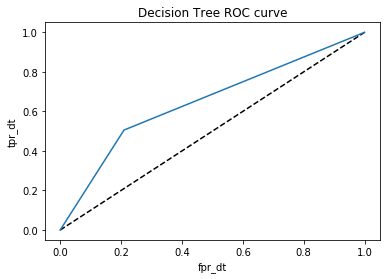

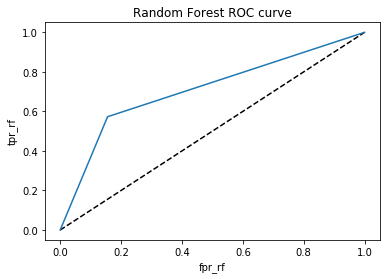

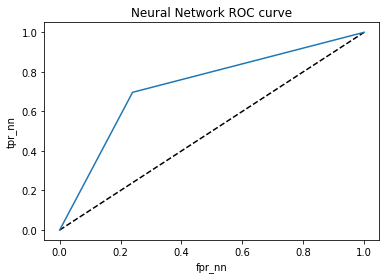

In [49]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_dt,tpr_dt, label='Decision Tree')
plt.xlabel('fpr_dt')
plt.ylabel('tpr_dt')
plt.title('Decision Tree ROC curve')
plt.show()

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, label='Random Forest')
plt.xlabel('fpr_rf')
plt.ylabel('tpr_rf')
plt.title('Random Forest ROC curve')
plt.show()

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_nn,tpr_nn, label='Nerural Network')
plt.xlabel('fpr_nn')
plt.ylabel('tpr_nn')
plt.title('Neural Network ROC curve')
plt.show()

AUC for the Curves


In [46]:
from sklearn.metrics import roc_auc_score
auc_dt=roc_auc_score(y_test,ypred_dt)
auc_rf=roc_auc_score(y_test,ypred_rf)
auc_nn=roc_auc_score(y_test,ypred_nn)
print("DT:",auc_dt,"  RF:",auc_rf,"  NN:",auc_nn)

DT: 0.6480185696023684   RF: 0.7086725425553387   NN: 0.7285541276996569
